# Model 1 - Count Vectorization / Logistic Regression

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_colwidth', None)

In [2]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [3]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post showing off my oxalis but Henk stole the show,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just this reason. It’s like a little jungle for him.,no_text,593,39723,0.98,1


In [4]:
plants.shape

(9271, 8)

In [5]:
X = plants['title']
y = plants['subreddit']

In [6]:
X.shape

(9271,)

### Train, Test, Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [8]:
X_train.shape

(6953,)

### Custom Stop Words

In [9]:
english_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())

In [10]:
custom_stop_words = ['ve', 'help', 'little']

In [11]:
all_stop_words = english_stop_words + custom_stop_words

### Benchmark Model

In [12]:
cvec_bench = CountVectorizer(stop_words = 'english')

In [13]:
X_train_df = pd.DataFrame(cvec_bench.fit_transform(X_train).todense(),
                          columns=cvec_bench.get_feature_names_out())

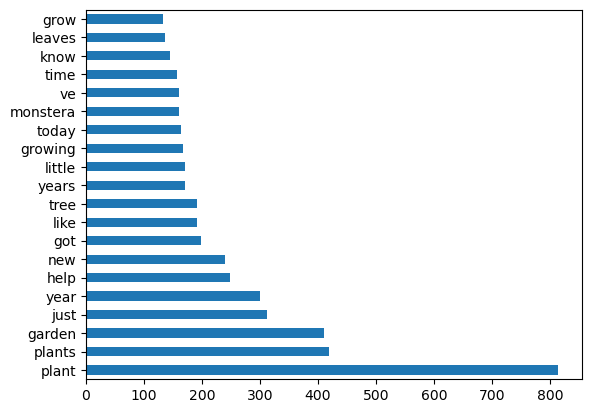

In [14]:
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [15]:
pipe_bench = Pipeline([
    ('cvec_bench', CountVectorizer(stop_words=all_stop_words)),
    ('log_reg_bench', LogisticRegression())
])

In [16]:
pipe_bench.fit(X_train, y_train)

Pipeline(steps=[('cvec_bench',
                 CountVectorizer(stop_words=['see', 'name', 'must', 'under',
                                             'have', 'during', 'hereupon',
                                             'formerly', 'upon', 'several',
                                             'perhaps', 'than', 'towards',
                                             'however', 'who', 'through',
                                             'though', 'never', 'become',
                                             'across', 'describe', 'yours',
                                             'ever', 'whither', 'detail', 'can',
                                             'each', 'wherein', 'my', 'there', ...])),
                ('log_reg_bench', LogisticRegression())])

In [17]:
pipe_bench.score(X_train, y_train)

0.9375809003307924

In [18]:
pipe_bench.score(X_test, y_test)

0.8373597929249353

In [19]:
1 - y.mean()

0.4891597454427785

In [20]:
pipe_bench.get_params()

{'memory': None,
 'steps': [('cvec_bench',
   CountVectorizer(stop_words=['see', 'name', 'must', 'under', 'have', 'during',
                               'hereupon', 'formerly', 'upon', 'several',
                               'perhaps', 'than', 'towards', 'however', 'who',
                               'through', 'though', 'never', 'become', 'across',
                               'describe', 'yours', 'ever', 'whither', 'detail',
                               'can', 'each', 'wherein', 'my', 'there', ...])),
  ('log_reg_bench', LogisticRegression())],
 'verbose': False,
 'cvec_bench': CountVectorizer(stop_words=['see', 'name', 'must', 'under', 'have', 'during',
                             'hereupon', 'formerly', 'upon', 'several',
                             'perhaps', 'than', 'towards', 'however', 'who',
                             'through', 'though', 'never', 'become', 'across',
                             'describe', 'yours', 'ever', 'whither', 'detail',
                  

### Production Model

In [21]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=all_stop_words)),
    ('log_reg', LogisticRegression())
])

In [22]:
pipe_params = {
    'cvec__max_features': [None, 3_000, 5_000],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.9, .95, 1],
    'cvec__ngram_range': [(1,1), (1, 2)],
    'cvec__stop_words': [None, 'english', all_stop_words]
}

In [23]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5)

In [24]:
%%time
gs.fit(X_train, y_train)

/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 41

CPU times: user 2min 23s, sys: 26 s, total: 2min 49s
Wall time: 1min 55s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['see',
                                                                    'name',
                                                                    'must',
                                                                    'under',
                                                                    'have',
                                                                    'during',
                                                                    'hereupon',
                                                                    'formerly',
                                                                    'upon',
                                                                    'several',
                                                                    'perhaps',
                                                                    'than',
                                                                    'towards',
                                                                    'however',
                                                                    'who',
                                                                    'through',
                                                                    'though',
                                                                    'never',
                                                                    'become',
                                                                    'across',
                                                                    'describe',
                                                                    'yours',
                                                                    'ever',
                                                                    'whither',
                                                                    'detail',
                                                                    'can',
                                                                    'each',
                                                                    'wherein',
                                                                    'my',
                                                                    'there', ...])),
                                       ('log_reg',...
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['see', 'name', 'must', 'under',
                                               'have', 'during', 'hereupon',
                                               'formerly', 'upon', 'several',
                                               'perhaps', 'than', 'towards',
                                               'however', 'who', 'through',
                                               'though', 'never', 'become',
                                               'across', 'describe', 'yours',
                                               'ever', 'whither', 'detail',
                                               'can', 'each', 'wherein', 'my',
                                               'there', ...]]})

In [25]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['see',
  'name',
  'must',
  'under',
  'have',
  'during',
  'hereupon',
  'formerly',
  'upon',
  'several',
  'perhaps',
  'than',
  'towards',
  'however',
  'who',
  'through',
  'though',
  'never',
  'become',
  'across',
  'describe',
  'yours',
  'ever',
  'whither',
  'detail',
  'can',
  'each',
  'wherein',
  'my',
  'there',
  'toward',
  'thick',
  'give',
  'been',
  'couldnt',
  'in',
  'seeming',
  'eleven',
  'keep',
  'myself',
  'some',
  'was',
  'everywhere',
  'eight',
  'too',
  'beforehand',
  'bottom',
  'ours',
  'down',
  'whom',
  'whole',
  'take',
  'hundred',
  'least',
  'somewhere',
  'something',
  'when',
  'call',
  'elsewhere',
  'around',
  'him',
  'then',
  'seem',
  'un',
  'otherwise',
  'latter',
  'hence',
  'three',
  'may',
  'nobody',
  'con',
  'enough',
  'should',
  'this',
  'could',
  'thin',
  'fire',
  'our',
 

### Scores

In [26]:
gs.score(X_train, y_train)

0.977419818783259

In [27]:
gs.score(X_test, y_test)

0.8468507333908541

### Predictions

In [28]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

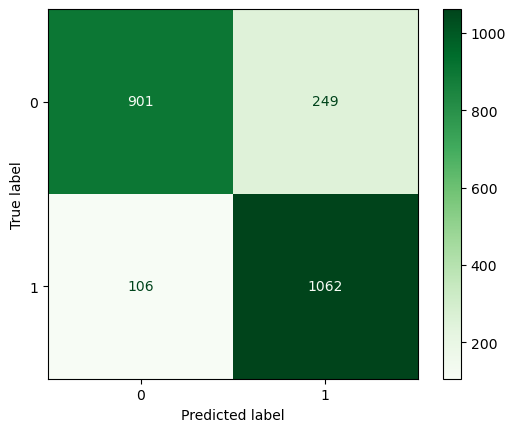

In [29]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Greens');

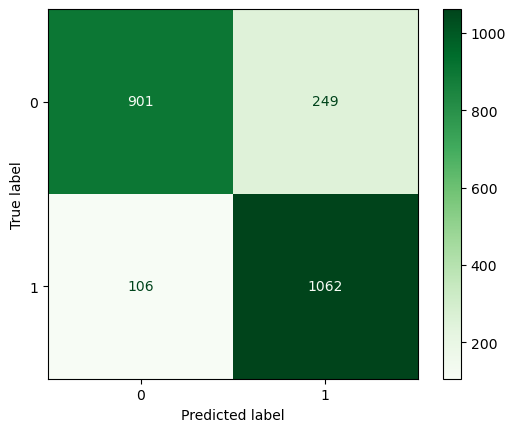

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Greens')
plt.savefig('../images/model_1_confusion', dpi=300); 

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.89474   0.78348   0.83542      1150
           1    0.81007   0.90925   0.85680      1168

    accuracy                        0.84685      2318
   macro avg    0.85240   0.84636   0.84611      2318
weighted avg    0.85207   0.84685   0.84619      2318



In [32]:
misclassified_indices = (preds != y_test)

In [33]:
misclassified_indices

5799    False
3599     True
4819    False
966     False
448     False
        ...  
4215    False
4852     True
4618    False
1474    False
6695     True
Name: subreddit, Length: 2318, dtype: bool

In [34]:
misclassified_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_indices],
    'True Labels': y_test[misclassified_indices],
    'Predicted_Labels': preds[misclassified_indices]
})

In [35]:
misclassified_df.head(25)

,Misclassified_Posts,True Labels,Predicted_Labels
3599,Any idea what this is ?,1,0
6600,so proud of my babies...,0,1
5622,ain’t stupid if it works,0,1
5030,Thought this sub would appreciate this post,0,1
5202,Before and after. Really proud.,0,1
5713,Social distancing in my safe room.,0,1
8511,What plant is this and how do I overwinter it in Nebraska?,0,1
6944,Has Anyone seen acorns so large before?,0,1
6135,"My preschooler came home with a milk carton filled with dirt. Per her words “we gotta give it suns, waters and winds.” So, we did that. Now what?",0,1
4218,"MoM, best way to cut back?",1,0
